In [1]:
# loading libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [88]:
# defining some helper functions
def model_paths(run_path):
    log_dir = [name for name in os.listdir(run_path) if os.path.isdir(os.path.join(run_path, name))]
    paths = [run_path + '/' + log_dir for log_dir in log_dir]
    return paths

def get_ytrue_yhat(csv_path: str, data_set_selection: list = ["train"]):
    data = pd.read_csv(csv_path)

    filtered_data = data[data['data_set'].isin(data_set_selection)]

    y_true = filtered_data['class_ID']
    y_pred = filtered_data['class_ID_pred']

    return y_true, y_pred

def evaluate_run(path: str, data_set_selection: list = ["test"]):
    title = path.rsplit('/', 1)[-1]
    csv_path = path + "/predictions.csv"

    y_true, y_pred = get_ytrue_yhat(csv_path, data_set_selection)

    accuracy = round(np.mean(y_true == y_pred),2)

    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax)
    ax.set_title(title)
    fig.suptitle(f'Data Set Selection: {data_set_selection} - Accuracy: {accuracy}', y=0.1)

    plt.savefig(path + "/confusion_matrix.png")
    plt.show()

    return title, accuracy

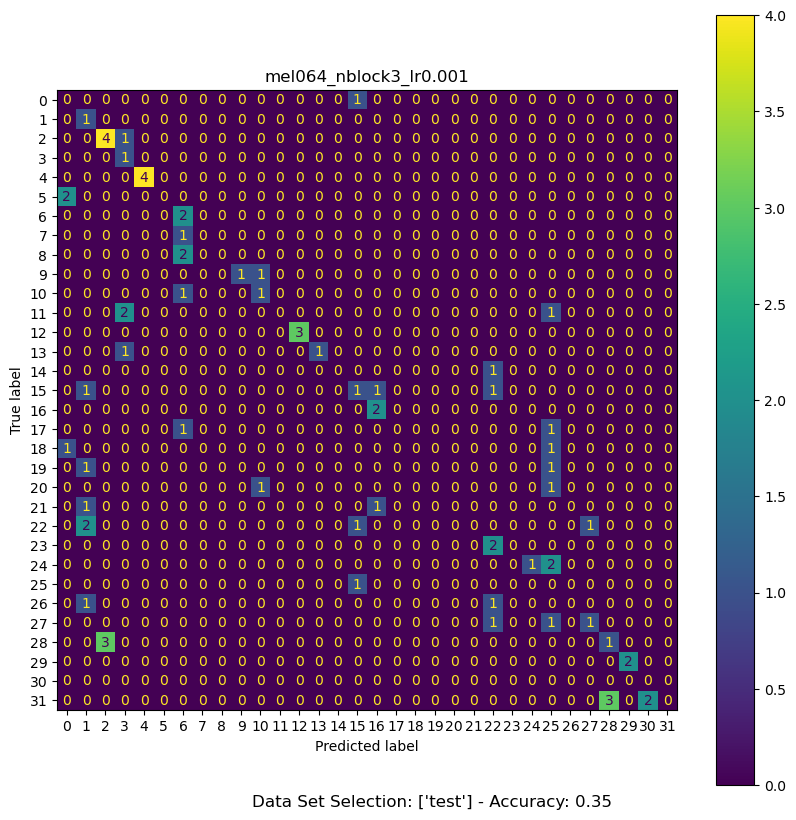

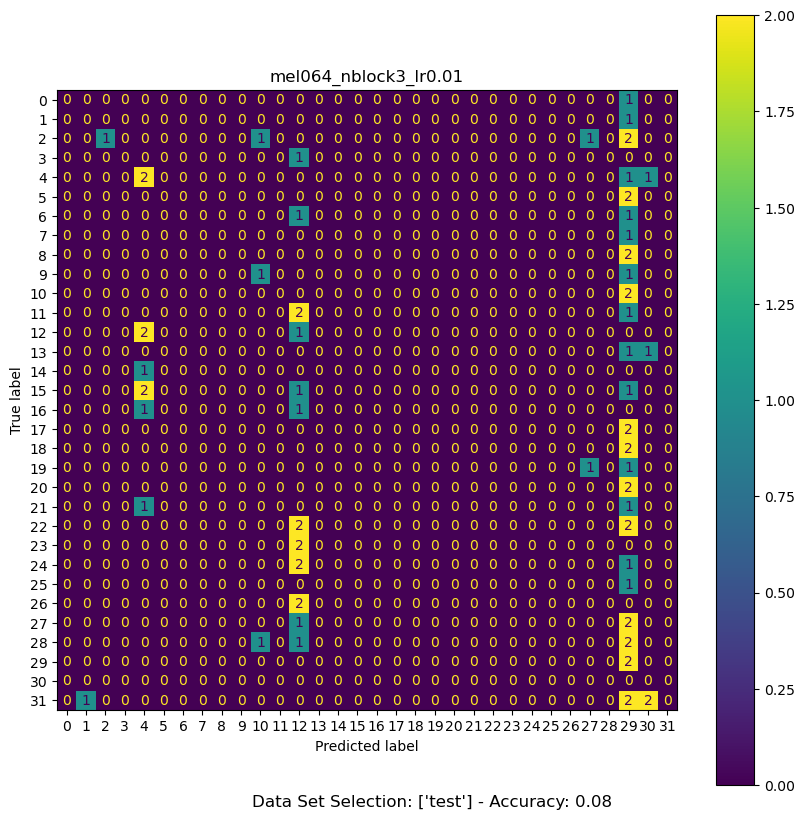

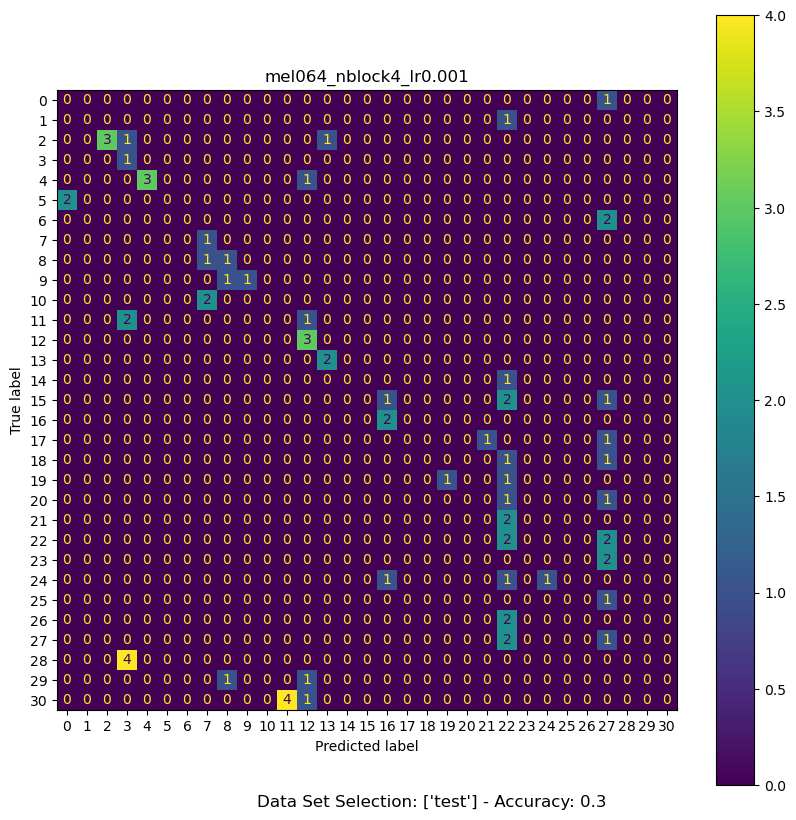

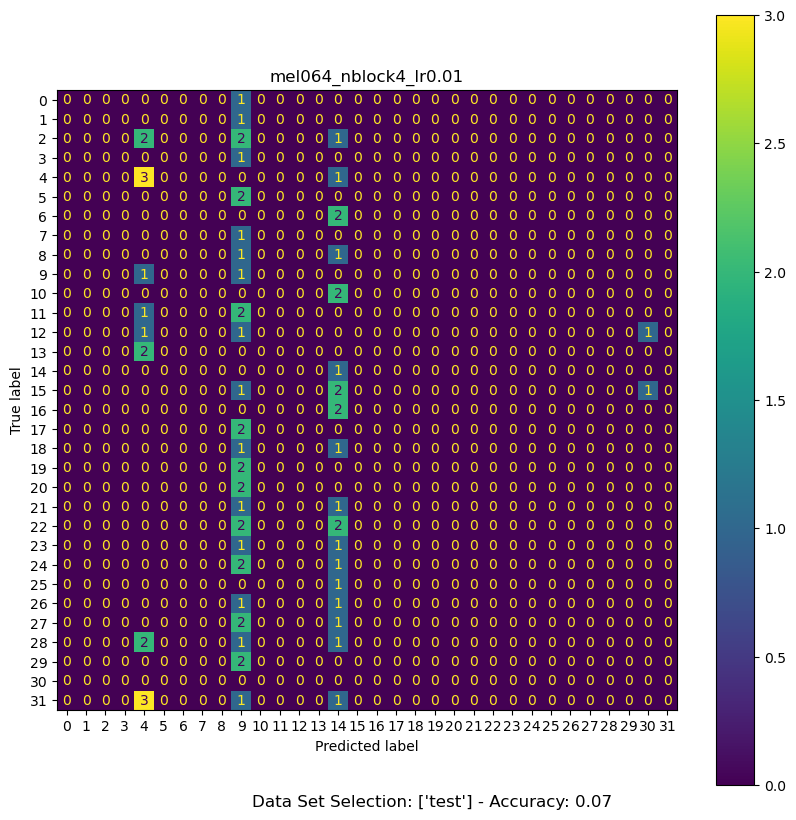

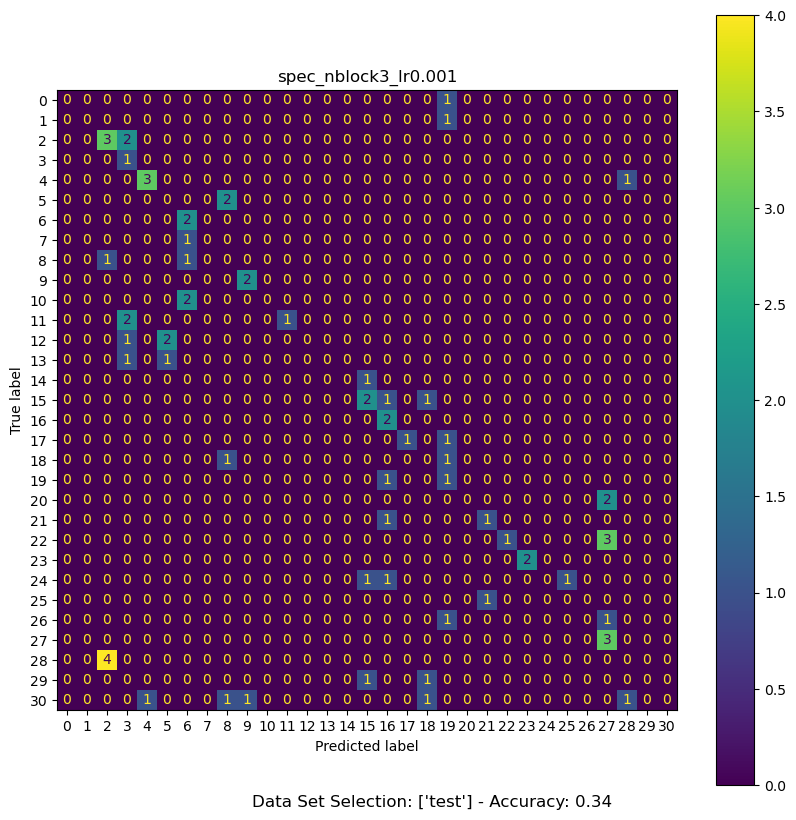

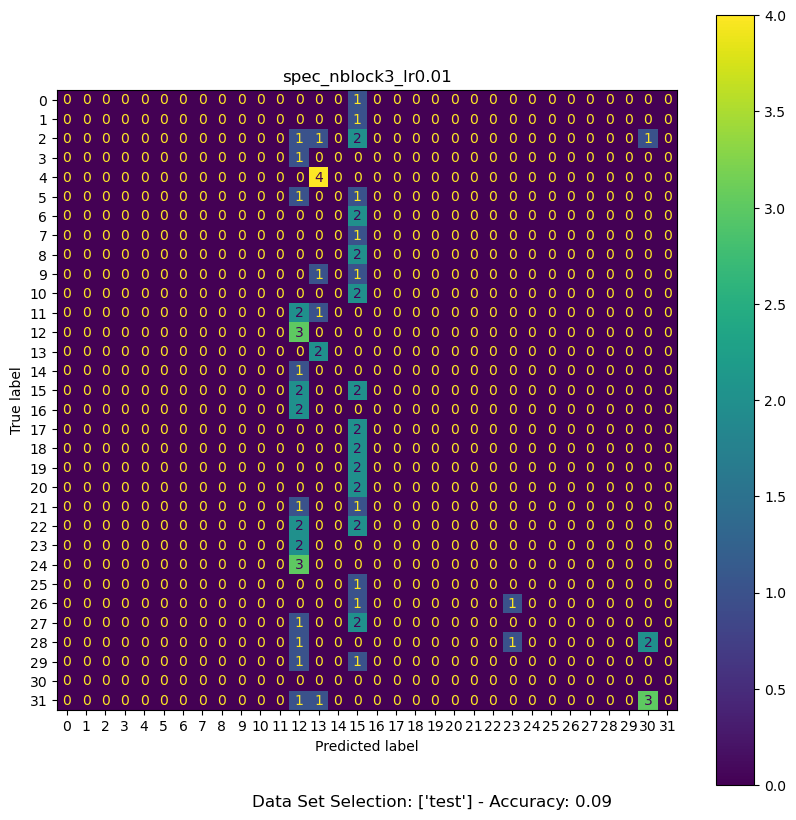

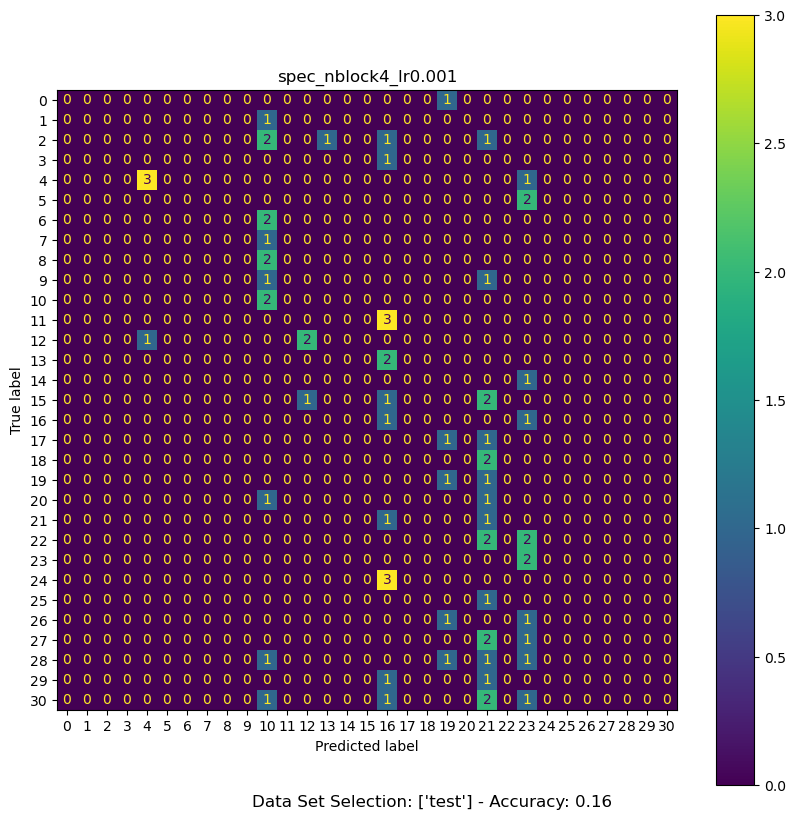

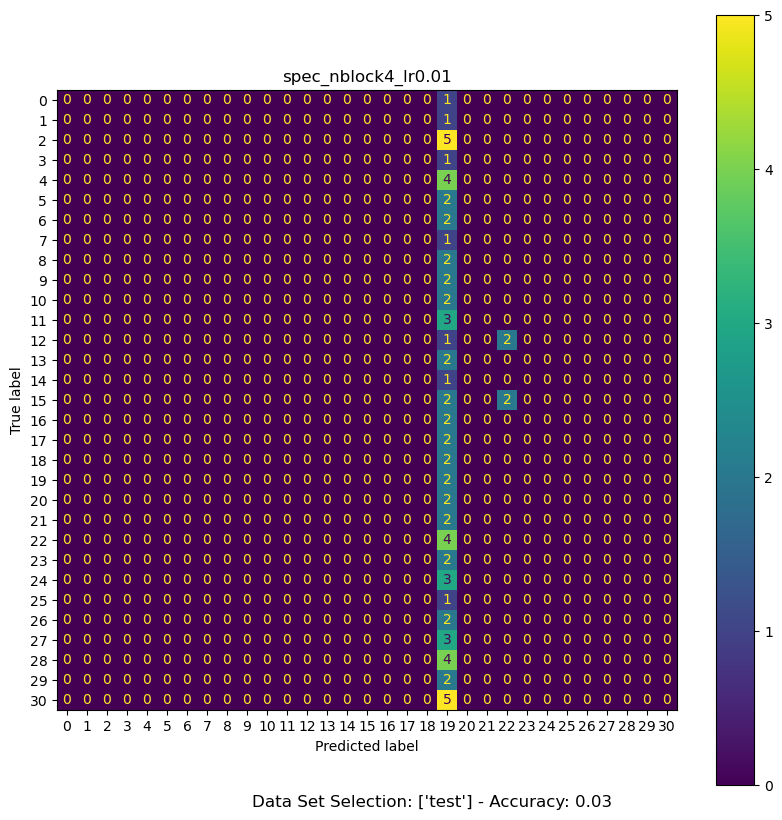

{'mel064_nblock3_lr0.001': 0.35, 'mel064_nblock3_lr0.01': 0.08, 'mel064_nblock4_lr0.001': 0.3, 'mel064_nblock4_lr0.01': 0.07, 'spec_nblock3_lr0.001': 0.34, 'spec_nblock3_lr0.01': 0.09, 'spec_nblock4_lr0.001': 0.16, 'spec_nblock4_lr0.01': 0.03}


In [89]:
source_path = '../logs/default'
paths = model_paths(source_path)

overview = {}

for path in paths:
    title, accuracy = evaluate_run(path, ["test"])

    overview[title] = accuracy

print(overview)

In [ ]:
{'mel064_nblock3_lr0.001': 0.35, 
 'mel064_nblock3_lr0.01': 0.08, 
 'mel064_nblock4_lr0.001': 0.3, 
 'mel064_nblock4_lr0.01': 0.07, 
 'spec_nblock3_lr0.001': 0.34, 
 'spec_nblock3_lr0.01': 0.09, 
 'spec_nblock4_lr0.001': 0.16, 
 'spec_nblock4_lr0.01': 0.03}